In [2]:
import pandas as pd
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

los datos abiertos de enacom se dividen en:
* telefonia movil
* telefonia fija
* acceso a internet 
* tv paga 
* servicios postales
* denuncias y reclamos
* licencias 
* espectro radioelectrico
* homologacion de equipos
* numeracion 
* fomeca 
* servicio universal

Mi interes se centra en los datos relacionados con las telecomunicaciones, por lo que datos relacionados con:
* servicios postales
* licencias 
* homologacion de equipos
* numeracion 
* fomeca 
* servicio universal
no los tomare en cuenta por no tener relacion.

Con lo cual mi analisis se realizara en base a los datos en:
* telefonia movil
* telefonia fija
* acceso a internet 
* tv paga
* denuncias y reclamos
* espectro radioelectrico

In [ ]:
# genero los dataframes

def sacar_tildes(oracion:str):
    '''
    oracion : str

    Recive un str y cambia todas las vocales con tilde a unas sin tilde
    '''
    
    a,b = 'áéíóúüñÁÉÍÓÚÜÑ','aeiouunAEIOUUN'
    trans = str.maketrans(a,b)
    return oracion.translate(trans)

#lista de dfs
dfs_lista = []

#dicionario con key: nombre del directorio, y value: lista con los nombres de los dfs pertenecientes a cada directorio
nombres_por_directorio = {}

#
direcotrio_principal = 'dataset/'
directorio = pathlib.Path(direcotrio_principal)
directorios = [fichero.name for fichero in directorio.iterdir() if fichero.is_dir()]

#itero por los directorios en la carpeta dataset
for dir in directorios:
    #lista con los dfs
    dfs=[]
    # lista nombre de los datasets
    nombre_datasets = []
    # ruta del directorio en el loop actaul
    ruta_seccion = 'dataset/'+dir
    # accedo al directorio
    with os.scandir(ruta_seccion) as ficheros:
        #itero sobre los archivos en el directorio actual
        for fichero in ficheros:
            #creo varaible vinculada a la ruta del archivo
            ruta_archivo= ruta_seccion+'/'+str(fichero)[11:-2]
            #nombre del archivo normalizado
            nombre_df = sacar_tildes(str(fichero)[11:-6].replace(' ','_'))
            #genero el df con pandas
            globals()[nombre_df] = pd.read_csv(ruta_archivo)
            # lo inseto en la lista de dfs
            dfs.append(globals()[nombre_df])
            # inserto el nombre del dataset en nombre_datasets
            nombre_datasets.append(nombre_df)
    #agrego la lista dfs a diccionario nombres_por_directorio 
    nombres_por_directorio[dir] = nombre_datasets
    # inserto lista dfs a la lista dfs_lista
    dfs_lista.append(dfs)

### Trabajo con los datos relacionados con internet por provincia

In [49]:
df_internet = dfs_lista[1] 

In [50]:
print(nombres_por_directorio['internet'][0])

#elimino ultima fila q no es una dato
df_internet[0] = df_internet[0].iloc[:-1]
df_internet[0]

Internet_fijo_Accesos-por-tecnologia


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,1,Buenos Aires,392.045,2.728.865,1.242.121,125.521,66.872,4.555.424
1,2022,1,Capital Federal,102.290,1.217.225,62.308,5.784,29.934,1.417.541
2,2022,1,Catamarca,14.181,15.517,29.118,1.328,2.234,62.378
3,2022,1,Chaco,32.391,64.546,36.662,8.164,2.356,144.119
4,2022,1,Chubut,44.133,66.667,9.184,30.592,21.052,171.628
...,...,...,...,...,...,...,...,...,...
787,2014,1,Santa Cruz,18.927,100,381,4.092,3.264,26.764
788,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
789,2014,1,Santiago Del Estero,32.567,3.598,19,915,34.000,37.133
790,2014,1,Tierra Del Fuego,21.618,2.837,648,1,2.934,28.038


In [16]:
df_internet[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           792 non-null    object 
 1   Trimestre     792 non-null    object 
 2   Provincia     792 non-null    object 
 3   ADSL          792 non-null    object 
 4   Cablemodem    792 non-null    object 
 5   Fibra óptica  792 non-null    object 
 6   Wireless      792 non-null    object 
 7   Otros         792 non-null    float64
 8   Total         792 non-null    object 
dtypes: float64(1), object(8)
memory usage: 55.8+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - Año 
            - Provincia
        - ordinal:
            - Trimestre
             
    - cuantitativos:
        - discretos:
            - ADSL
            - Cablemodem
            - Fibra óptica
            - Wireless
            - Otros
            - Total

In [47]:
print(nombres_por_directorio['internet'][1])
df_internet[1]

Internet_fijo_Accesos-por-velocidad


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,1,Buenos Aires,31.591,30.056,313.382,321.756,290.127,161.183,3.381.049,26.280,4.555.424
1,2022,1,Capital Federal,527.000,5.575,39.918,77.390,61.053,43.289,1.188.072,1.717,1.417.541
2,2022,1,Catamarca,71.000,456.000,4.386,7.009,8.773,3.761,35.715,2.207,62.378
3,2022,1,Chaco,461.000,1.099,16.888,21.235,20.898,13.012,62.946,7.580,144.119
4,2022,1,Chubut,113.000,1.677,61.369,31.856,33.080,13.871,14.055,15.607,171.628
...,...,...,...,...,...,...,...,...,...,...,...,...
787,2014,1,Santa Cruz,161.000,1.625,24.972,1.000,1.000,0.000,0,0.000,26.760
788,2014,1,Santa Fe,8.456,124.468,345.225,20.328,6.845,23.000,668,0.000,506.013
789,2014,1,Santiago Del Estero,1.234,10.531,22.817,2.422,109.000,0.000,0,0.000,37.113
790,2014,1,Tierra Del Fuego,12.000,607.000,30.902,6.000,0.000,0.000,0,0.000,31.527


In [20]:
df_internet[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  792 non-null    int64  
 1   Trimestre            792 non-null    int64  
 2   Provincia            792 non-null    object 
 3   HASTA 512 kbps       792 non-null    float64
 4   + 512 Kbps - 1 Mbps  792 non-null    float64
 5   + 1 Mbps - 6 Mbps    792 non-null    object 
 6   + 6 Mbps - 10 Mbps   792 non-null    float64
 7   + 10 Mbps - 20 Mbps  792 non-null    float64
 8   + 20 Mbps - 30 Mbps  792 non-null    float64
 9   + 30 Mbps            792 non-null    object 
 10  OTROS                786 non-null    float64
 11  Total                792 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 74.4+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - Año
            - Provincia
        - ordinal:
            - Trimestre

    - cuantitativos:
        - continuos:
            - HASTA 512 kbps
            - '+ 512 Kbps - 1 Mbps'
            - '+ 1 Mbps - 6 Mbps'
            - '+ 6 Mbps - 10 Mbps'
            - '+ 10 Mbps - 20 Mbps'
            - '+ 20 Mbps - 30 Mbps'
            - '+ 30 Mbps'
            - 'OTROS'
            - 'Total'
       

In [22]:
print(nombres_por_directorio['internet'][2])
df_internet[2]

Internet_fijo_banda_ancha_y__angosta_provincia


,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,1,Buenos Aires,4.549.131,6.293,4.555.424
1,2022,1,Capital Federal,1.415.378,2.163,1.417.541
2,2022,1,Catamarca,62.377,1,62.378
3,2022,1,Chaco,144.114,5,144.119
4,2022,1,Chubut,170.701,927,171.628
...,...,...,...,...,...,...
787,2014,1,Santa Cruz,26.304,460,26.764
788,2014,1,Santa Fe,506.000,612,506.612
789,2014,1,Santiago Del Estero,37.124,9,37.133
790,2014,1,Tierra Del Fuego,27.272,766,28.038


In [24]:
df_internet[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     792 non-null    int64 
 1   Trimestre               792 non-null    int64 
 2   Provincia               792 non-null    object
 3   Mbps (Media de bajada)  792 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.9+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - 'Año'
            - 'Provincia'
        - ordinal:
            - 'Trimestre'
            
    - cuantitativos:
        - continuos:
            - 'Banda ancha fija'
            - 'Dial up'
            - 'Total'

In [26]:
print(nombres_por_directorio['internet'][3])
df_internet[3]

Internet_fijo_historico_velocidad


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,1,Buenos Aires,63
1,2022,1,Capital Federal,88
2,2022,1,Catamarca,51
3,2022,1,Chaco,46
4,2022,1,Chubut,13
...,...,...,...,...
787,2014,1,Santa Cruz,3
788,2014,1,Santa Fe,3
789,2014,1,Santiago Del Estero,3
790,2014,1,Tierra Del Fuego,3


In [30]:
df_internet[3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     792 non-null    int64 
 1   Trimestre               792 non-null    int64 
 2   Provincia               792 non-null    object
 3   Mbps (Media de bajada)  792 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 24.9+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - 'Año'
            - 'Provincia'
        - ordinal:
            - 'Trimestre'
    - cuantitativos:
        - dicretos:
            - 'Mbps (Media de bajada)'

In [29]:
print(nombres_por_directorio['internet'][6])
df_internet[6]

Internet_fijo_Total_accesos_banda_ancha_y_angosta


,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
1,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
2,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021
3,2021,2,9.852.702,10.382,9.863.084,Abr-Jun 2021
4,2021,1,9.637.956,10.016,9.647.972,Ene-Mar 2021
5,2020,4,9.561.546,10.016,9.571.562,Oct-Dic 2020
6,2020,3,9.346.183,10.016,9.356.199,Jul-Sept 2020
7,2020,2,9.021.040,10.016,9.031.056,Abr-Jun 2020
8,2020,1,8.802.435,9.991,8.812.426,Ene-Mar 2020
9,2019,4,8.783.053,10.128,8.793.181,Oct-Dic 2019


In [34]:
df_internet[6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               33 non-null     int64  
 1   Trimestre         33 non-null     int64  
 2   Banda ancha fija  33 non-null     object 
 3   Dial up           33 non-null     float64
 4   Total             33 non-null     object 
 5   Periodo           33 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - 'Año'
            - 'Periodo'
        - ordinal:
            - 'Trimestre'
            
    - cuantitativos:
        - continuos:
            - 'Banda ancha fija'
            - 'Dial up'
            - 'Total'

In [31]:
print(nombres_por_directorio['internet'][8])
df_internet[8]

Internet_fijo_velocidad_bajada_provincia


,Año,Trimestre,Provincia,Otros,"0,256 Mbps","0,375 Mbps","0,625 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",...,70 Mbps,71 Mbps,75 Mbps,77 Mbps,78 Mbps,80 Mbps,81 Mbps,83 Mbps,82 Mbps,86 Mbps
0,2022.0,1.0,Buenos Aires,"26,280",19,- 0,- 0,"31,380",192,"5,958",...,"3,163",- 0,"100,884",- 0,4,212,- 0,2,- 0,- 0
1,2022.0,1.0,Capital Federal,"1,717",31,- 0,- 0,461,35,"1,407",...,3,- 0,"31,684",- 0,- 0,8,- 0,- 0,- 0,- 0
2,2022.0,1.0,Catamarca,"2,207",- 0,- 0,- 0,34,37,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
3,2022.0,1.0,Chaco,"7,580",- 0,225,111,234,2,- 0,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
4,2022.0,1.0,Chubut,"15,607",8,- 0,- 0,73,32,"1,069",...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2017.0,4.0,Santa Fe,"14,119",- 0,- 0,- 0,"3,109",- 0,"7,637",...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
429,2017.0,4.0,Santiago Del Estero,- 0,- 0,- 0,- 0,41,- 0,909,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
430,2017.0,4.0,Tierra Del Fuego,- 0,- 0,- 0,- 0,6,- 0,282,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0
431,2017.0,4.0,Tucumán,- 0,- 0,- 0,- 0,105,- 0,1,...,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0


In [39]:
df_internet[8].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 97 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Año         432 non-null    float64
 1   Trimestre   432 non-null    float64
 2   Provincia   432 non-null    object 
 3   Otros       432 non-null    object 
 4   0,256 Mbps  432 non-null    object 
 5   0,375 Mbps  432 non-null    object 
 6   0,625 Mbps  432 non-null    object 
 7   0,5 Mbps    432 non-null    object 
 8   0,512 Mbps  432 non-null    object 
 9   0,75 Mbps   432 non-null    object 
 10  1 Mbps      432 non-null    object 
 11  1,2 Mbps    432 non-null    object 
 12  1,25 Mbps   432 non-null    object 
 13  1,5 Mbps    432 non-null    object 
 14  2 Mbps      432 non-null    object 
 15  2,2 Mbps    432 non-null    object 
 16  2,5 Mbps    433 non-null    object 
 17  6,7 Mbps    432 non-null    object 
 18  3 Mbps      432 non-null    object 
 19  3,2 Mbps    432 non-null    o

In [38]:
df_internet[8].columns

Index(['Año', 'Trimestre', 'Provincia', 'Otros', '0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps',
       '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps',
       '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps',
       '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps',
       '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps',
       '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps',
       '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps',
       '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
       '59 Mbps', '60 Mbps', '61 Mbp

* Muchos datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - 'Año'
            - 'Provincia'
        - ordinal:
            - 'Trimestre'
    - cuantitativos:
        - continuos:
            - 'Otros'
        - dicretos:
            - '0,256 Mbps', '0,375 Mbps',
       '0,625 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps',
       '1,2 Mbps', '1,25 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps',
       '6,7 Mbps', '3 Mbps', '3,2 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps',
       '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps',
       '8 Mbps', '9 Mbps', '10 Mbps', '10,6 Mbps', '11 Mbps', '12 Mbps',
       '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps',
       '19 Mbps', '20 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps',
       '25 Mbps', '25,1 Mbps', '25,11 Mbps', '25,5 Mbps', '26 Mbps', '28 Mbps',
       '29 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '34 Mbps', '35 Mbps',
       '36 Mbps', '37 Mbps', '38 Mbps', '39 Mbps', '40 Mbps', '41 Mbps',
       '45 Mbps', '46 Mbps', '47 Mbps', '48 Mbps', '49 Mbps', '50 Mbps',
       '51 Mbps', '52 Mbps', '54 Mbps', '55 Mbps', '56 Mbps', '58 Mbps',
       '59 Mbps', '60 Mbps', '61 Mbps', '62 Mbps', '63 Mbps', '64 Mbps',
       '65 Mbps', '66 Mbps', '67 Mbps', '68 Mbps', '70 Mbps', '71 Mbps',
       '75 Mbps', '77 Mbps', '78 Mbps', '80 Mbps', '81 Mbps', '83 Mbps',
       '82 Mbps', '86 Mbps'

### Trabajo con los datos relacionados con telefonia fija por provincia

In [42]:
df_telefonia_fija = dfs_lista[3] 

In [44]:
print(nombres_por_directorio['telefonia_fija'][0])
df_telefonia_fija[0]

Accesos_de_telefonia_fija_por_provincia


,Año,Trimestre,Provincia,Accesos telefonía fija (total),Accesos telefonía fija (hogares),Accesos telefonía fija (comercial),Accesos telefonía fija (gobierno),Accesos telefonía fija (otros)
0,2022,1,Buenos Aires,3.340.707,3.044.152,230.980,14.831,50.744
1,2022,1,Capital Federal,1.508.031,1.374.162,104.267,6.695,22.907
2,2022,1,Catamarca,30.167,27.489,2.086,134.000,458.000
3,2022,1,Chaco,84.847,77.315,5.866,377.000,1.289
4,2022,1,Chubut,72.602,66.157,5.020,322.000,1.103
...,...,...,...,...,...,...,...,...
787,2014,1,Santa Cruz,40.625,33.555,4.528,131.000,2.411
788,2014,1,Santa Fe,770.361,636.284,85.867,2.491,45.719
789,2014,1,Santiago del Estero,70.717,58.409,7.882,229.000,4.197
790,2014,1,Tierra del Fuego,32.631,26.951,3.637,106.000,1.937


In [45]:
df_telefonia_fija[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Año                                 792 non-null    int64  
 1   Trimestre                           792 non-null    int64  
 2   Provincia                           792 non-null    object 
 3   Accesos telefonía fija (total)      792 non-null    object 
 4   Accesos telefonía fija (hogares)    792 non-null    object 
 5   Accesos telefonía fija (comercial)  792 non-null    float64
 6   Accesos telefonía fija (gobierno)   792 non-null    float64
 7   Accesos telefonía fija (otros)      792 non-null    float64
dtypes: float64(3), int64(2), object(3)
memory usage: 49.6+ KB


In [46]:
df_telefonia_fija[0].columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos telefonía fija (total)',
       'Accesos telefonía fija (hogares)',
       'Accesos telefonía fija (comercial)',
       'Accesos telefonía fija (gobierno)', 'Accesos telefonía fija (otros)'],
      dtype='object')

* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
             - 'Año'
             - 'Provincia'
        - ordinal:
            - 'Trimestre'
    - cuantitativos:
        - continuos: 
            - 'Accesos telefonía fija (total)'
            - 'Accesos telefonía fija (hogares)'
            - 'Accesos telefonía fija (comercial)'
            - 'Accesos telefonía fija (gobierno)'
            - 'Accesos telefonía fija (otros)'

In [47]:
print(nombres_por_directorio['telefonia_fija'][1])
df_telefonia_fija[1]

Ingresos_trimestrales_por_la_prestacion_del_servicio_de_telefonia_fija


,Año,Trimestre,Ingresos (miles de $)
0,2014,1,"2.916.071,75"
1,2014,2,"2.974.865,2"
2,2014,3,"3.105.462,02"
3,2014,4,"3.339.690,9"
4,2015,1,"3.260.124,75"
5,2015,2,"3.425.518,48"
6,2015,3,"3.590.883,18"
7,2015,4,"3.815.364,12"
8,2016,1,"4.198.260,39"
9,2016,2,"4.718.769,82"


In [48]:
df_telefonia_fija[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    33 non-null     int64 
 1   Trimestre              33 non-null     int64 
 2   Ingresos (miles de $)  33 non-null     object
dtypes: int64(2), object(1)
memory usage: 920.0+ bytes


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - 'Año'
        - ordinal:
            - 'Trimestre'
            
    - cuantitativos:
        - continuos:
            - 'Ingresos (miles de $)'

In [50]:
print(nombres_por_directorio['telefonia_fija'][2])
df_telefonia_fija[2]

Penetracion_trimestral_de_la_telefonia_fija_por_provincia


,Año,Trimestre,Provincia,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares
0,2014,1,Buenos Aires,26.72,85.26
1,2014,1,Capital Federal,52.66,128.57
2,2014,1,Catamarca,10.03,39.45
3,2014,1,Chaco,9.09,34.02
4,2014,1,Chubut,17.66,57.59
...,...,...,...,...,...
787,2022,1,Santa Cruz,7.43,24.98
788,2022,1,Santa Fe,17.84,56.72
789,2022,1,Santiago del Estero,6.93,27.91
790,2022,1,Tierra del Fuego,12.54,42.30


In [51]:
df_telefonia_fija[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Año                                          792 non-null    int64  
 1   Trimestre                                    792 non-null    int64  
 2   Provincia                                    792 non-null    object 
 3   Accesos telefonía fija por cada 100 hab      792 non-null    float64
 4   Accesos telefonía fija por cada 100 hogares  792 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 31.1+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - 'Año'
            - 'Provincia'
        - ordinal:
            - 'Trimestre'
    - cuantitativos:
        - continuos:
            - 'Accesos telefonía fija por cada 100 hab'
            - 'Accesos telefonía fija por cada 100 hogares'

In [53]:
print(nombres_por_directorio['telefonia_fija'][3])
df_telefonia_fija[3]

Penetraciontotalnacionaldelatelefoniafijaportrimestre


,Año,Trimestre,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares
0,2022,1,"16,96","54,71"
1,2021,4,"16,74","53,88"
2,2021,3,"15,41","49,64"
3,2021,2,"15,62","50,35"
4,2021,1,"15,92","51,36"
5,2020,4,"16,16","52,03"
6,2020,3,"16,35","52,68"
7,2020,2,"16,46","53,06"
8,2020,1,"16,7","53,89"
9,2019,4,"17,2","55,55"


In [54]:
df_telefonia_fija[3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Año                                          33 non-null     int64 
 1   Trimestre                                    33 non-null     int64 
 2   Accesos telefonía fija por cada 100 hab      33 non-null     object
 3   Accesos telefonía fija por cada 100 hogares  33 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - 'Año'
        - ordinal:
            - 'Trimestre'
    - cuantitativos:
        - continuos:
            - 'Accesos telefonía fija por cada 100 hab'
            - 'Accesos telefonía fija por cada 100 hogares'

### Trabajo con los datos relacionados con telefonia movil por provincia

In [5]:
df_telefonia_movil = dfs_lista[4] 

In [6]:
print(nombres_por_directorio['telefonia_movil'][0])
df_telefonia_movil[0]

Portabilidad


,Año,Mes,Personal,Claro,Nextel,Movistar,Total general
0,2022,2,"71,090","98,497",NaN,"95,792","265,379"
1,2022,1,"73,717","88,856",NaN,"96,240","258,813"
2,2021,12,"75,534","116,284",NaN,"102,538","294,356"
3,2021,11,"81,311","126,052",NaN,"104,985","312,348"
4,2021,10,"59,953","109,684",NaN,"94,402","264,039"
...,...,...,...,...,...,...,...
115,2012,7,"13,494","9,651",487.0,"10,173","33,805"
116,2012,6,"10,472","10,153",676.0,"9,523","30,824"
117,2012,5,"10,770","15,663",312.0,"7,890","34,635"
118,2012,4,"4,883","2,188",26.0,937,"8,034"


In [6]:
df_telefonia_movil[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            120 non-null    int64  
 1   Mes            120 non-null    int64  
 2   Personal       120 non-null    object 
 3   Claro          120 non-null    object 
 4   Nextel         78 non-null     float64
 5   Movistar       120 non-null    object 
 6   Total general  120 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 6.7+ KB


* La unica columna con datos faltantes es Nextel

* tipos de datos:
    - catergoticos:
        - nominal:
            - 'Año'
            - 'Mes'
    - cuantitativos:
        - continuos:
            - 'Personal'
            - 'Claro'
            - 'Nextel'
            - 'Movistar'
            - 'Total general'
        

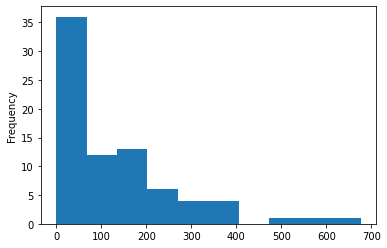

In [7]:
df_telefonia_movil[0]['Nextel'].plot.hist(bins= 10)
# print(histogram)
plt.show()

In [75]:
df_telefonia_movil[0]['Nextel'].describe()

count     78.000000
mean     126.512821
std      142.875638
min        0.000000
25%       12.250000
50%       91.500000
75%      174.250000
max      676.000000
Name: Nextel, dtype: float64

<AxesSubplot:title={'center':'Nextel'}, xlabel='Mes'>

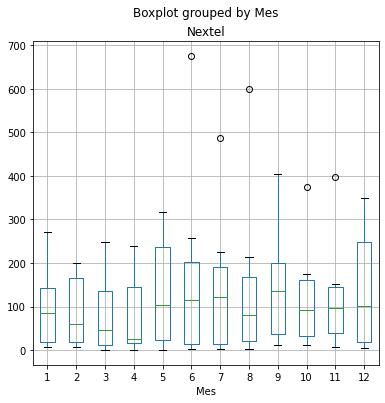

In [76]:
df_telefonia_movil[0].boxplot(column="Nextel", by="Mes", figsize=(6,6))

Completo la columna con la media

In [8]:
df_telefonia_movil[0].fillna(df_telefonia_movil[0].mean,inplace= True)

In [8]:
print(nombres_por_directorio['telefonia_movil'][1])
df_telefonia_movil[1]

Telefonia_movil


,Año,Trimestre,Número de SMS salientes,Periodo
0,2013,1,36.430.004.057,Ene-Mar 2013
1,2013,2,34.255.065.773,Abr-Jun 2013
2,2013,3,33.217.669.903,Jul-Sept 2013
3,2013,4,22.547.130.953,Oct-Dic 2013
4,2014,1,18.393.198.881,Ene-Mar 2013
5,2014,2,15.877.208.560,Abr-Jun 2014
6,2014,3,14.201.444.366,Jul-Sept 2014
7,2014,4,12.287.624.401,Oct-Dic 2014
8,2015,1,14.254.061.889,Ene-Mar 2015
9,2015,2,12.732.243.852,Abr-Jun 2015


In [9]:
df_telefonia_movil[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Año                      37 non-null     int64 
 1   Trimestre                37 non-null     int64 
 2   Número de SMS salientes  37 non-null     object
 3   Periodo                  37 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.3+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - 'Año'
            - 'Periodo'
        - ordinal:
            - 'Trimestre'
    - cuantitativos:
        - continuos:
            - 'Número de SMS salientes'

### Trabajo con los datos relacionados con tv

In [11]:
df_tv = dfs_lista[5] 

In [12]:
print(nombres_por_directorio['tv'][0])
df_tv[0]

Accesos_de_television_por_suscripcion_por_provincia


,Año,Trimestre,Provincia,Accesos TV por suscripción
0,2022,1,Buenos Aires,2.975.672
1,2022,1,Capital Federal,745.263
2,2022,1,Catamarca,47.123
3,2022,1,Chaco,119.743
4,2022,1,Chubut,77.728
...,...,...,...,...
787,2014,1,Santa Cruz,21.133
788,2014,1,Santa Fe,546.523
789,2014,1,Santiago del Estero,92.972
790,2014,1,Tierra del Fuego,29.886


In [14]:
df_tv[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Año                         792 non-null    int64 
 1   Trimestre                   792 non-null    int64 
 2   Provincia                   792 non-null    object
 3   Accesos TV por suscripción  792 non-null    object
dtypes: int64(2), object(2)
memory usage: 24.9+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - Año
            - Provincia 
        - ordinal:
            - Trimestre 
    - cuantitativos:
        - continuos:
            - Accesos TV por suscripción  


In [18]:
print(nombres_por_directorio['tv'][1])
df_tv[1]

television_paga_ingresos_trimestrales_prestacion


,Año,Trimestre,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,1,$ 41.970.821,$ 21.267.929
1,2021,4,$ 38.273.392,$ 18.038.065
2,2021,3,$ 36.398.026,$ 18.039.520
3,2021,2,$ 33.674.996,$ 18.038.442
4,2021,1,$ 31.924.515,$ 18.038.361
5,2020,4,$ 26.324.099,$ 14.479.623
6,2020,3,$ 25.386.155,$ 12.933.200
7,2020,2,$ 24.620.009,$ 12.544.726
8,2020,1,$ 25.147.466,$ 12.352.764
9,2019,4,$ 22.785.447,$ 12.150.589


In [19]:
df_tv[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 4 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Año                                        33 non-null     int64 
 1   Trimestre                                  33 non-null     int64 
 2   Ingresos TV por suscripción  (miles de $)  33 non-null     object
 3   Ingresos TV satelital (miles de $)         33 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - Año 
        - ordinal:
            - Trimestre
    - cuantitativos:
        - continuos:
            - Ingresos TV por suscripción  (miles de $)
            - Ingresos TV satelital (miles de $)
            

In [16]:
print(nombres_por_directorio['tv'][2])
df_tv[2]

television_penetracion_total_suscripcion_y_satelital


,Año,Trimestre,Accesos TV por suscripción por cada 100 hab,Accesos TV satelital por cada 100 hab,Accesos TV por suscripción por cada 100 hogares,Accesos TV satelital por cada 100 hogares
0,2022,1,"16,41","4,45","52,61","14,25"
1,2021,4,"16,52","4,37","52,99","14,02"
2,2021,3,"16,73","4,68","53,72","15,03"
3,2021,2,"16,02","5,08","51,48","16,33"
4,2021,1,"16,09","4,95","51,74","15,93"
5,2020,4,"16,1","5,09","51,8","16,39"
6,2020,3,"16,13","5,4","51,95","17,38"
7,2020,2,"15,93","5,41","51,36","17,45"
8,2020,1,"15,97","5,43","51,51","17,52"
9,2019,4,"16,17","5,45","52,21","17,6"


In [17]:
df_tv[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Año                                              33 non-null     int64 
 1   Trimestre                                        33 non-null     int64 
 2   Accesos TV por suscripción por cada 100 hab      33 non-null     object
 3   Accesos TV satelital por cada 100 hab            33 non-null     object
 4   Accesos TV por suscripción por cada 100 hogares  33 non-null     object
 5   Accesos TV satelital por cada 100 hogares        33 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.7+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - Año 
        - ordinal:
            - Trimestre
    - cuantitativos:
        - continuos:
            - Accesos TV por suscripción por cada 100 hab
            - Accesos TV satelital por cada 100 hab 
            - Accesos TV por suscripción por cada 100 hogares
            - Accesos TV satelital por cada 100 hogares

### Trabajo con los datos relacionados con reclamos

In [22]:
df_reclamos = dfs_lista[2] 

In [23]:
print(nombres_por_directorio['reclamos'][0])
df_reclamos[0]

Reclamos_mensuales_por_tipo_de_servicio


,Año,Mes,Telefonía Fija,Internet Fijo,Comunicaciones Moviles,TV por cable,Total mensual
0,2022,1,1.218,675,233,101,2.227
1,2022,2,1.241,567,238,92,2.138
2,2022,3,1.689,749,279,150,2.867
3,2022,4,1.341,635,250,95,2.321
4,2022,5,1.146,576,295,91,2.108
5,2022,6,965.000,471,214,80,1.730
6,2022,7,879.000,499,223,117,1.718
7,2022,8,914.000,478,302,88,1.782
8,2022,9,722.000,419,295,100,1.536
9,2022,10,759.000,434,241,107,1.541


In [24]:
df_reclamos[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     11 non-null     int64  
 1   Mes                     11 non-null     int64  
 2   Telefonía Fija          11 non-null     float64
 3   Internet Fijo           11 non-null     int64  
 4   Comunicaciones Moviles  11 non-null     int64  
 5   TV por cable            11 non-null     int64  
 6   Total mensual           11 non-null     float64
dtypes: float64(2), int64(5)
memory usage: 744.0 bytes


* Sin datos faltantes
* No hay mucha informacion spbre otros años

* tipos de datos:
    - catergoticos:
        - nominal:
            - Año
            - Mes
    - cuantitativos:
        - continuos:
            - Telefonía Fija
            - Total mensual 
        - discretos:
            - Internet Fijo
            - Comunicaciones Moviles
            - TV por cable 

In [25]:
print(nombres_por_directorio['reclamos'][1])
df_reclamos[1]

Reclamos_mensuales_recibidos_por_motivo_de_reclamo


,Año,Mes,Problemas técnicos,Facturación,Gestiones administrativas,Otros,Total mensual
0,2022,1,1507,379,267,74,2227
1,2022,2,1418,381,241,98,2138
2,2022,3,1896,546,326,99,2867
3,2022,4,1401,524,300,96,2321
4,2022,5,1280,507,250,71,2108
5,2022,6,1039,381,242,68,1730
6,2022,7,961,422,259,76,1718
7,2022,8,868,517,280,117,1782
8,2022,9,742,441,252,101,1536
9,2022,10,770,412,265,94,1541


In [26]:
df_reclamos[1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Año                        11 non-null     int64
 1   Mes                        11 non-null     int64
 2   Problemas técnicos         11 non-null     int64
 3   Facturación                11 non-null     int64
 4   Gestiones administrativas  11 non-null     int64
 5   Otros                      11 non-null     int64
 6   Total mensual              11 non-null     int64
dtypes: int64(7)
memory usage: 744.0 bytes


* Sin datos faltantes
* No hay mucha informacion spbre otros años

* tipos de datos:
    - catergoticos:
        - nominal:
            - Año
            - Mes
            
    - cuantitativos:
        - discretos:
            - Problemas técnicos
            - Facturación 
            - Gestiones administrativas
            - Otros
            - Total mensual 

In [27]:
print(nombres_por_directorio['reclamos'][2])
df_reclamos[2]

Reclamos_por_operador_y_motivo_de_reclamo


,Año,Mes,Motivo de Reclamo,Operador,Cantidad
0,2022,1,Facturación,AMX Argentina S.A. (Claro),9
1,2022,1,Facturación,DIRECTV Argentina S.A.L,4
2,2022,1,Facturación,Fibertel S.A. (TCI),3
3,2022,1,Facturación,Movistar - Telefonica Moviles Argentina S.A.,23
4,2022,1,Facturación,Otros,8
...,...,...,...,...,...
381,2022,11,Problemas Técnicos,Otros,51
382,2022,11,Problemas Técnicos,TELECENTRO S.A.,45
383,2022,11,Problemas Técnicos,Telecom Argentina S.A.,506
384,2022,11,Problemas Técnicos,Telefonica de Argentina S.A.,197


In [28]:
df_reclamos[2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Año                386 non-null    int64 
 1   Mes                386 non-null    int64 
 2   Motivo de Reclamo  386 non-null    object
 3   Operador           386 non-null    object
 4   Cantidad           386 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.2+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - Año
            - Mes
            - Motivo de Reclamo
            - Operador
            
    - cuantitativos:
        - discretos:
            -  Cantidad 

### Trabajo con los datos relacionados con estaciones repetidoras

In [30]:
df_repetidoras = dfs_lista[0] 

In [31]:
print(nombres_por_directorio['estaciones_repetidoras'][0])
df_repetidoras[0]

EstacionesRepetidoras


,Frecuencia de Salida [MHz],Frecuencia de Entrada [MHz],Diferencia en Frecuencia [MHz],Subtono [Hz],Usa Subtono,Localidad,Provincia,Señal Distintiva,Radioclub,CUIT,Vencimiento
0,"29,67","29,57","-0,1",0,NaN,CORDOBA,CORDOBA,LU4HH,RADIO CLUB CORDOBA,30660960925,6/12/2023
1,"53,7","52,7",-1,67,NaN,CABA,CABA,LU5CBA,CENTRO DE RADIOAFICIONADOS CIUDAD DE BUENOS AIRES,30678983388,13/9/2023
2,"145,21","144,61","-0,6",67,NaN,SAN RAFAEL,MENDOZA,LU1MEK,PABLO DANIEL ARCO,20248669862,26/3/2024
3,"145,21","144,61","-0,6",67,NaN,AVELLANEDA,BUENOS AIRES,LU8EB,MARCELO OMAR BLANCO,20230604437,8/11/2023
4,"145,23","144,63","-0,6",67,NaN,LANUS,BUENOS AIRES,LU8EB,MARCELO OMAR BLANCO,20230604437,8/11/2023
...,...,...,...,...,...,...,...,...,...,...,...
186,"434,9","439,9",5,100,NaN,COMODORO RIVADAVIA,CHUBUT,LU7WA,GUSTAVO GUILLERMO CONRAD COSTANZO,20251384852,27/12/2023
187,"434,9","439,9",5,"127,3",NaN,CABA,CABA,LU1CGB,ADRIAN GABRIEL SINCLAIR,20170316836,8/11/2023
188,"434,925","439,925",5,"127,3",NaN,CABA,CABA,LU1CGB,ADRIAN GABRIEL SINCLAIR,20170316836,8/11/2023
189,"434,95","439,95",5,"127,3",NaN,CABA,CABA,LU1CGB,ADRIAN GABRIEL SINCLAIR,20170316836,8/11/2023


In [32]:
df_repetidoras[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Frecuencia de Salida [MHz]      191 non-null    object
 1   Frecuencia de Entrada [MHz]     191 non-null    object
 2   Diferencia en Frecuencia [MHz]  191 non-null    object
 3   Subtono [Hz]                    191 non-null    object
 4   Usa Subtono                     8 non-null      object
 5   Localidad                       191 non-null    object
 6   Provincia                       191 non-null    object
 7   Señal Distintiva                191 non-null    object
 8   Radioclub                       191 non-null    object
 9   CUIT                            191 non-null    int64 
 10  Vencimiento                     191 non-null    object
dtypes: int64(1), object(10)
memory usage: 16.5+ KB


* Sin datos faltantes

* tipos de datos:
    - catergoticos:
        - nominal:
            - Localidad
            - Provincia
            - Señal Distintiva 
            - Radioclub 
            - CUIT   
            - Vencimiento 
            
    - cuantitativos:
        - continuos:
            - Frecuencia de Salida [MHz]
            - Frecuencia de Entrada [MHz] 
            - Diferencia en Frecuencia [MHz] 
            - Subtono [Hz]  
            - Usa Subtono   